# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [2]:
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

# sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
athletes.head(6)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0


In [6]:
_sample_height = get_sample(athletes, ["height"], 3000)  
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [7]:
def q1():
    # Retorne aqui o resultado da questão 1.  
    return sct.shapiro(_sample_height)[1] > 0.05

q1()

False

Q1 result == False

Help on function shapiro in module scipy.stats.morestats:

shapiro(x)
    Perform the Shapiro-Wilk test for normality.
    
    The Shapiro-Wilk test tests the null hypothesis that the
    data was drawn from a normal distribution.
    
    Parameters
    ----------
    x : array_like
        Array of sample data.
    
    Returns
    -------
    W : float
        The test statistic.
    p-value : float
        The p-value for the hypothesis test.
    
    See Also
    --------
    anderson : The Anderson-Darling test for normality
    kstest : The Kolmogorov-Smirnov test for goodness of fit.
    
    Notes
    -----
    The algorithm used is described in [4]_ but censoring parameters as
    described are not implemented. For N > 5000 the W test statistic is accurate
    but the p-value may not be.
    
    The chance of rejecting the null hypothesis when it is true is close to 5%
    regardless of sample size.
    
    References
    ----------
    .. [1] https://w

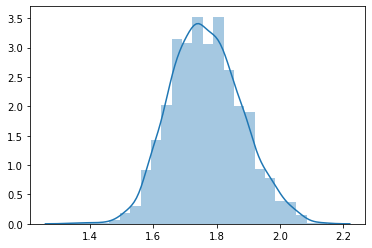

In [8]:
print(f"Q1 result == {q1()}\n")
help(sct.shapiro)

sns.distplot(_sample_height, bins=25)

Help on function qqplot in module statsmodels.graphics.gofplots:

qqplot(data, dist=<scipy.stats._continuous_distns.norm_gen object at 0x7fdbdb2dfdd0>, distargs=(), a=0, loc=0, scale=1, fit=False, line=None, ax=None, **plotkwargs)
    Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
    
    Can take arguments specifying the parameters for dist or fit them
    automatically. (See fit under Parameters.)
    
    Parameters
    ----------
    data : array-like
        1d data array
    dist : A scipy.stats or statsmodels distribution
        Compare x against dist. The default
        is scipy.stats.distributions.norm (a standard normal).
    distargs : tuple
        A tuple of arguments passed to dist to specify it fully
        so dist.ppf may be called.
    loc : float
        Location parameter for dist
    a : float
        Offset for the plotting position of an expected order statistic, for
        example. The plotting positions are given by (i - a)/(nobs

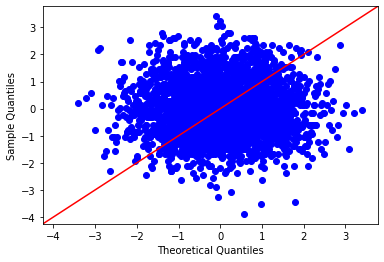

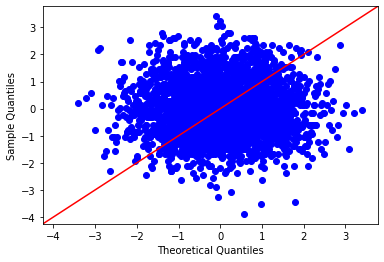

In [9]:
help(sm.qqplot)
sm.qqplot(_sample_height, line="45", fit=True)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [24]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return bool(sct.jarque_bera(_sample_height)[1] > 0.05)
    
q2()

False

In [11]:
print(f"Q2 result == {q2()}\n")
help(sct.jarque_bera)

Q2 result == False

Help on function jarque_bera in module scipy.stats.stats:

jarque_bera(x)
    Perform the Jarque-Bera goodness of fit test on sample data.
    
    The Jarque-Bera test tests whether the sample data has the skewness and
    kurtosis matching a normal distribution.
    
    Note that this test only works for a large enough number of data samples
    (>2000) as the test statistic asymptotically has a Chi-squared distribution
    with 2 degrees of freedom.
    
    Parameters
    ----------
    x : array_like
        Observations of a random variable.
    
    Returns
    -------
    jb_value : float
        The test statistic.
    p : float
        The p-value for the hypothesis test.
    
    References
    ----------
    .. [1] Jarque, C. and Bera, A. (1980) "Efficient tests for normality,
           homoscedasticity and serial independence of regression residuals",
           6 Econometric Letters 255-259.
    
    Examples
    --------
    >>> from scipy import st

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [12]:
_sample_weight = get_sample(athletes, "weight", 3000)

def q3():
    # Retorne aqui o resultado da questão 3.
    return bool(sct.stats.normaltest(_sample_weight)[1] > 0.05)
    
q3()

False

Help on function normaltest in module scipy.stats.stats:

normaltest(a, axis=0, nan_policy='propagate')
    Test whether a sample differs from a normal distribution.
    
    This function tests the null hypothesis that a sample comes
    from a normal distribution.  It is based on D'Agostino and
    Pearson's [1]_, [2]_ test that combines skew and kurtosis to
    produce an omnibus test of normality.
    
    
    Parameters
    ----------
    a : array_like
        The array containing the sample to be tested.
    axis : int or None, optional
        Axis along which to compute test. Default is 0. If None,
        compute over the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.
    
    Returns
    -------
    statistic : float or array
        ``s^2 + k^2``, wh

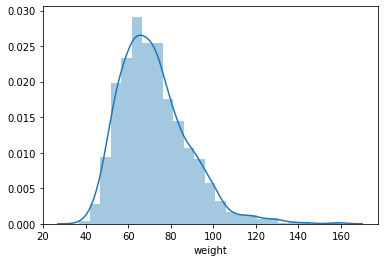

In [13]:
help(sct.stats.normaltest)
sns.distplot(_sample_weight, bins=25)

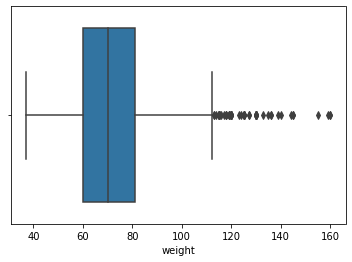

In [14]:
sns.boxplot(_sample_weight)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [15]:
_sample_weight_log = np.log(_sample_weight)

def q4():
    # Retorne aqui o resultado da questão 4.
    return bool(sct.stats.normaltest(_sample_weight_log)[1] > 0.05)

q4()

False

NormaltestResult(statistic=45.91534331977353, pvalue=1.0705572101256944e-10)


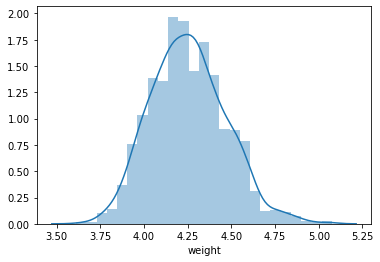

In [16]:
print(sct.stats.normaltest(_sample_weight_log))
sns.distplot(_sample_weight_log, bins=25)
# sns.distplot(_sample_weight, bins=25)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [17]:
bra = athletes[athletes["nationality"] == "BRA"]["height"]
usa = athletes[athletes["nationality"] == "USA"]["height"]
can = athletes[athletes["nationality"] == "CAN"]["height"]

print(f"bra_na = {bra.isna().sum()}\t usa_na = {usa.isna().sum()}\t can_na = {can.isna().sum()}")
bra.dropna(inplace=True)
usa.dropna(inplace=True)
can.dropna(inplace=True)
print(f"bra_na = {bra.isna().sum()}\t usa_na = {usa.isna().sum()}\t can_na = {can.isna().sum()}")

bra_na = 9	 usa_na = 7	 can_na = 1
bra_na = 0	 usa_na = 0	 can_na = 0


/home/xx/.pyenv/versions/3.7.5/envs/codenationModule5/lib/python3.7/site-packages/pandas/core/series.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [34]:
def q5():
    # Retorne aqui o resultado da questão 5.
    return bool(sct.stats.ttest_ind(bra, usa, nan_policy="omit", equal_var=False)[1] > 0.05)

q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [33]:
def q6():
    # Retorne aqui o resultado da questão 6.
    return bool(sct.stats.ttest_ind(bra, can, nan_policy="omit", equal_var=False)[1] > 0.05)

q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [32]:
def q7():
    # Retorne aqui o resultado da questão 7.
    return float(sct.stats.ttest_ind(usa, can, nan_policy="omit", equal_var=False)[1].round(8))

q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

0.9948291210964366
0.9948291210964366
0.9948291210964366


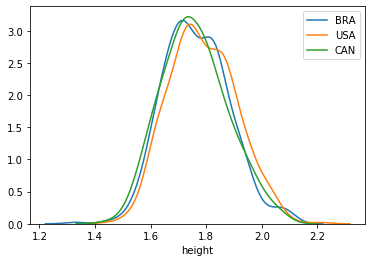

In [21]:
ax_bra = sns.distplot(bra, hist=False, kde_kws={"legend":True, "label":"BRA"})
ax_usa = sns.distplot(usa, hist=False, kde_kws={"legend":True, "label":"USA"})
ax_can = sns.distplot(can, hist=False, kde_kws={"legend":True, "label":"CAN"})

data_lines_bra = {"x": ax_bra.lines[0].get_xdata(), "y": ax_bra.lines[0].get_ydata()} 
data_lines_usa = {"x": ax_usa.lines[0].get_xdata(), "y": ax_usa.lines[0].get_ydata()}
data_lines_can = {"x": ax_can.lines[0].get_xdata(), "y": ax_can.lines[0].get_ydata()} 

# plt.axvline(data_lines_bra["x"][np.argmax(data_lines_bra["y"])], color='blue')
# plt.axvline(data_lines_usa["x"][np.argmax(data_lines_usa["y"])], color='red')
# plt.axvline(data_lines_can["x"][np.mean(data_lines_can["y"])], color='green')
print(np.mean(data_lines_bra["y"]))
print(np.mean(data_lines_usa["y"]))
print(np.mean(data_lines_can["y"]))
# np.argmax(data_lines_can["y"])

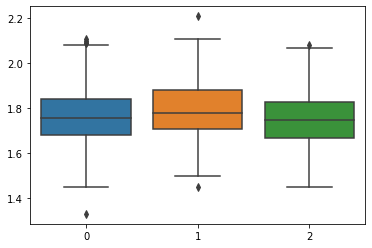

In [22]:
sns.boxplot(data = [bra, usa, can])